# Import the Main Library

In [ ]:
## TensorFlow and Helper Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load the Dataset

In [ ]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Show Count and size of Images

In [ ]:
train_images.shape

(60000, 28, 28)

# Show Count of Label

In [ ]:
len(np.unique(train_labels))

10

Label for this image is: 4


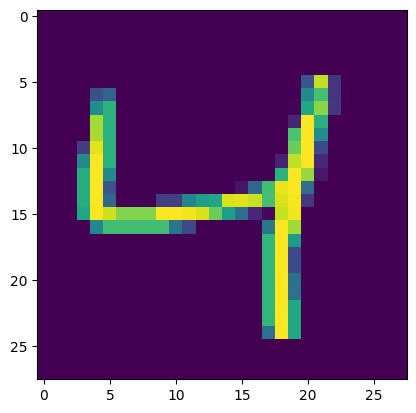

In [ ]:
i = 2
print(f"Label for this image is: {train_labels[i]}")
plt.imshow(train_images[i]);

# **Building CNN Model**

In [ ]:
CNN = models.Sequential()

CNN.add(layers.Conv2D(16, (3, 3), input_shape=(28, 28, 1)))
CNN.add(layers.MaxPooling2D())
## Add another pair of Conv2D and MaxPoolling2D for more model depth,
## followed by the flatten and multiple dense layers
CNN.add(layers.Conv2D(32, (3, 3)))
CNN.add(layers.MaxPooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Dense(64, activation="relu"))

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Dense(32, activation="relu"))

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Dense(10, activation="softmax"))
CNN.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,474 (228.41 KB)

 Trainable params: 58,474 (228.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
CNN.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

In [ ]:
CNN.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.3748 - loss: 3.5258
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.8431 - loss: 0.5370
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9140 - loss: 0.3031
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9381 - loss: 0.2259
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9490 - loss: 0.1915
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9531 - loss: 0.1678
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9561 - loss: 0.1600
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9589 - loss: 0.1507
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9642 - loss: 0.1408
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9675 - loss: 0.1255


In [ ]:
test_loss, test_acc = CNN.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 3s - 9ms/step - accuracy: 0.9783 - loss: 0.0879

Test accuracy: 0.9782999753952026


## **Done!**